<a href="https://colab.research.google.com/github/AadityaAdh/weather_prediction/blob/main/weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
whole_dataset=pd.read_csv("/content/seattle_weather.csv")

In [64]:
whole_dataset=whole_dataset.dropna()

In [65]:
whole_dataset.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [66]:
whole_dataset.tail()

,DATE,PRCP,TMAX,TMIN,RAIN
25546,2017-12-10,0.0,49,34,False
25547,2017-12-11,0.0,49,29,False
25548,2017-12-12,0.0,46,32,False
25549,2017-12-13,0.0,48,34,False
25550,2017-12-14,0.0,50,36,False


In [67]:
whole_dataset.shape

(25548, 5)

In [68]:
len(whole_dataset)

25548

In [69]:
whole_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25548 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25548 non-null  int64  
 3   TMIN    25548 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.2+ MB


In [70]:
whole_dataset.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25548.000000,25548.000000
mean,0.106222,59.543056,44.513387
std,0.239031,12.773265,8.893019
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [71]:
x=whole_dataset.loc[:,"TMAX"].mean()
print(x)

59.54305620792234


In [72]:
exclude_columns = ['DATE', 'RAIN']

# Normalize each numerical column using standardization
for column in whole_dataset.columns:
    if column not in exclude_columns:
        my_mean = whole_dataset[column].mean()
        my_std = whole_dataset[column].std()
        # Update values in the column using vectorized operation
        whole_dataset[column] = (whole_dataset[column] - my_mean) / my_std


In [73]:
whole_dataset.describe()

,PRCP,TMAX,TMIN
count,2.554800e+04,2.554800e+04,2.554800e+04
mean,-3.393072e-17,1.245981e-16,2.625459e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.443834e-01,-4.348384e+00,-5.005430e+00
25%,-4.443834e-01,-7.471118e-01,-7.324157e-01
50%,-4.443834e-01,-1.208036e-01,5.471859e-02
75%,-2.602847e-02,7.403702e-01,8.418529e-01
max,2.055704e+01,3.402180e+00,2.978360e+00


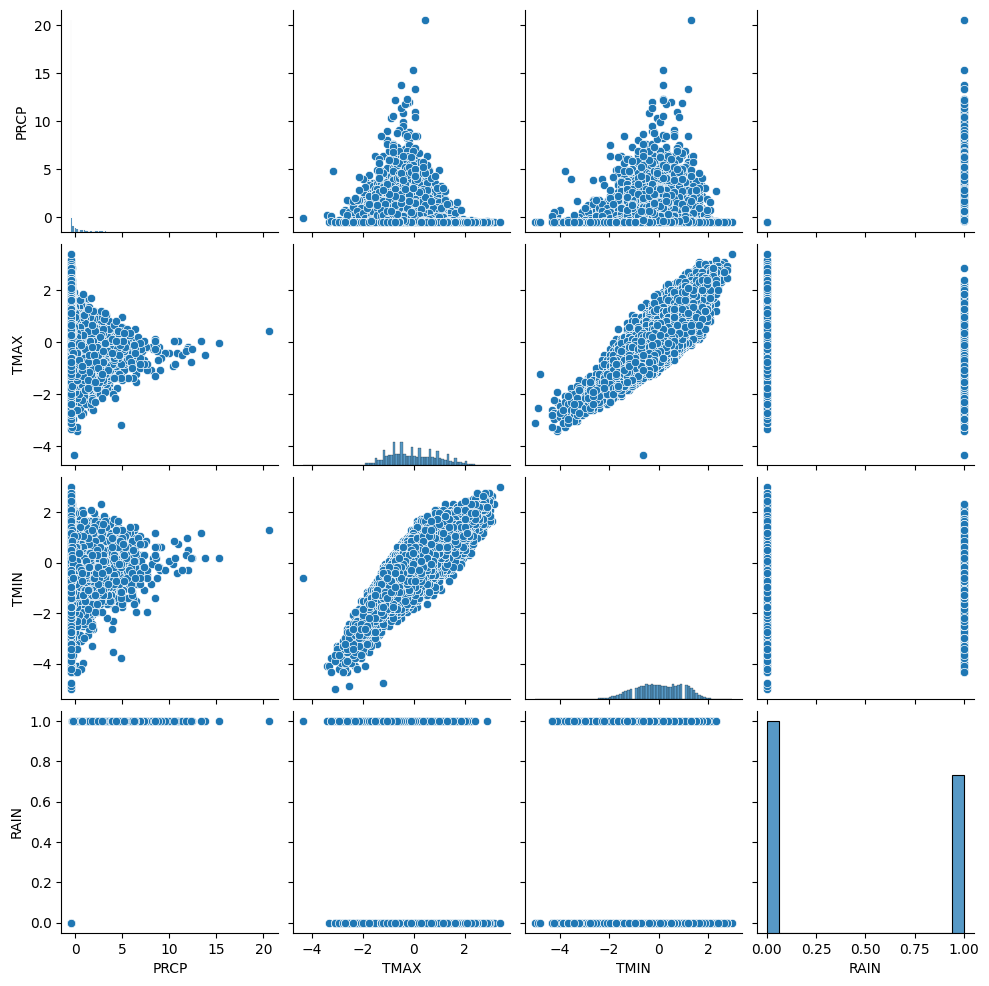

In [74]:
sns.pairplot(whole_dataset)

In [75]:
def x_data(dataframe,type):
  length=len(dataframe)
  if type=="train":
    low=0
    high=int(length*0.7)
    return dataframe.iloc[low:high,1:-1].values
  elif type=="valid":
    low=int(length*0.7)
    high=int(length*0.9)
    return dataframe.iloc[low:high,1:-1].values
  elif type=="test":
    low=int(length*0.9)
    return dataframe.iloc[low:,1:-1].values





In [76]:
train_x=x_data(whole_dataset,"train")
train_x

array([[ 1.52188494, -0.66882324, -0.28262468],
       [ 2.02391091, -1.13855438, -0.95731123],
       [ 1.31270745, -1.13855438, -1.06975899],
       ...,
       [-0.44438344, -1.29513142, -1.2946545 ],
       [ 0.01580703, -1.13855438, -1.2946545 ],
       [-0.44438344, -1.29513142, -1.18220674]])

In [77]:
valid_x=x_data(whole_dataset,"valid")
valid_x

array([[-0.44438344, -1.2168429 , -1.63199777],
       [-0.44438344, -1.37341994, -1.63199777],
       [ 0.14131352, -1.29513142, -1.85689329],
       ...,
       [ 2.98612735, -0.82540029, -0.84486347],
       [ 0.01580703, -0.98197733, -0.73241571],
       [-0.36071245, -0.98197733, -0.84486347]])

In [78]:
test_x=x_data(whole_dataset,"test")
test_x

array([[-0.44438344, -0.82540029, -0.5075202 ],
       [-0.10969946, -0.90368881, -0.84486347],
       [ 0.14131352, -0.98197733, -0.95731123],
       ...,
       [-0.44438344, -1.06026586, -1.40710226],
       [-0.44438344, -0.90368881, -1.18220674],
       [-0.44438344, -0.74711177, -0.95731123]])

In [79]:
train_x.shape

(17883, 3)

In [80]:
def y_data(dataframe,type):
  length=len(dataframe)
  k=dataframe.copy()
  for columns in k:
    if columns=="RAIN":
      for i,elements in enumerate(k[columns]):
        if elements==True or elements=="True":
          k.iloc[i,-1]=1
        elif elements ==False or elements=="False":
          k.iloc[i,-1]=0


  if type=="train":
    low=0
    high=int(length*0.7)
    return k.iloc[low:high,-1].values
  elif type=="valid":
    low=int(length*0.7)
    high=int(length*0.9)
    return k.iloc[low:high,-1].values
  elif type=="test":
    low=int(length*0.9)
    return k.iloc[low:,-1].values





In [81]:
train_y=y_data(whole_dataset,"train")
train_y

array([1, 1, 1, ..., 0, 1, 0], dtype=object)

In [82]:
valid_y=y_data(whole_dataset,"valid")
valid_y

array([0, 0, 1, ..., 1, 1, 1], dtype=object)

In [83]:
test_y=y_data(whole_dataset,"test")
test_y

array([0, 1, 1, ..., 0, 0, 0], dtype=object)

In [84]:
len(train_x)

17883

In [85]:
len(train_y)

17883

In [86]:
type(train_x)

numpy.ndarray

In [87]:
import tensorflow as tf
train_x = tf.data.Dataset.from_tensor_slices(train_x)
valid_x = tf.data.Dataset.from_tensor_slices(valid_x)
test_x = tf.data.Dataset.from_tensor_slices(test_x)




In [88]:
len(train_x)

17883

In [89]:
type(train_y)

numpy.ndarray

In [90]:
import numpy as np

In [91]:
train_y=train_y.astype(np.int32)
valid_y=valid_y.astype(np.int32)
test_y=test_y.astype(np.int32)

In [92]:
train_y = tf.data.Dataset.from_tensor_slices(train_y)
valid_y = tf.data.Dataset.from_tensor_slices(valid_y)
test_y = tf.data.Dataset.from_tensor_slices(test_y)

In [93]:
train_dataset=tf.data.Dataset.zip(train_x,train_y)
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(16).prefetch(tf.data.experimental.AUTOTUNE)
valid_dataset=tf.data.Dataset.zip(valid_x,valid_y)
valid_dataset = valid_dataset.shuffle(buffer_size=1024).batch(16).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset=tf.data.Dataset.zip(test_x,test_y)
test_dataset = test_dataset.shuffle(buffer_size=1024).batch(16)


In [94]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,InputLayer,BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

In [95]:
def build_model():
  model=Sequential()
  model.add(InputLayer((3,)))
  model.add(Dense(32,activation='relu'))
  model.add(BatchNormalization())

  model.add(Dense(64,activation='relu'))
  model.add(BatchNormalization())


  model.add(Dense(64,activation='relu'))
  model.add(BatchNormalization())

  model.add(Dense(32,activation='relu'))
  model.add(BatchNormalization())

  model.add(Dense(16,activation='relu'))
  model.add(BatchNormalization())


  model.add(Dense(1,activation='sigmoid'))
  return model


In [96]:
model=build_model()

In [97]:
model.compile(optimizer=Adam(learning_rate=0.01),loss=BinaryCrossentropy(),metrics=['accuracy'])

In [98]:
model.fit(train_dataset,validation_data=valid_dataset,epochs=20,verbose=1)

Epoch 1/20
1118/1118 [==============================] - 8s 5ms/step - loss: 0.0916 - accuracy: 0.9690 - val_loss: 3.5235 - val_accuracy: 0.4256
Epoch 2/20
1118/1118 [==============================] - 4s 4ms/step - loss: 0.0329 - accuracy: 0.9891 - val_loss: 0.0026 - val_accuracy: 0.9998
Epoch 3/20
1118/1118 [==============================] - 5s 5ms/step - loss: 0.0265 - accuracy: 0.9928 - val_loss: 3.0706 - val_accuracy: 0.7671
Epoch 4/20
1118/1118 [==============================] - 4s 4ms/step - loss: 0.0384 - accuracy: 0.9883 - val_loss: 0.1251 - val_accuracy: 0.9924
Epoch 5/20
1118/1118 [==============================] - 4s 4ms/step - loss: 0.0131 - accuracy: 0.9975 - val_loss: 0.0883 - val_accuracy: 0.9573
Epoch 6/20
1118/1118 [==============================] - 4s 3ms/step - loss: 0.0133 - accuracy: 0.9963 - val_loss: 0.2266 - val_accuracy: 0.9984
Epoch 7/20
1118/1118 [==============================] - 4s 4ms/step - loss: 0.0260 - accuracy: 0.9936 - val_loss: 0.4785 - val_accuracy:

In [99]:
model.evaluate(test_dataset)

160/160 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000


[0.004530766513198614, 1.0]